<a href="https://colab.research.google.com/github/loosak/pysnippets/blob/master/pd_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Conditional Column Based on Values of Another Column

In [ ]:
import pandas as pd
import numpy as np

peoples = { 
  'Name': ['Jane', 'Melissa', 'John', 'Matt', 'Pepek'],
  'Age': [23, 45, 35, 64, 44],
  'Birth City': ['London', 'Paris', 'Toronto', 'Atlanta', 'Vranov'],
  'Gender': ['F', 'F', 'M', 'M', 'M']
 }

df = (
  pd.DataFrame(peoples)
    #.assign(Gender.astype('category'))
)
df['Gender'] = df.Gender.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        5 non-null      object  
 1   Age         5 non-null      int64   
 2   Birth City  5 non-null      object  
 3   Gender      5 non-null      category
dtypes: category(1), int64(1), object(2)
memory usage: 377.0+ bytes


In [ ]:
df.loc[df['Age'] < 40]

,Name,Age,Birth City,Gender
0,Jane,23,London,F
2,John,35,Toronto,M


In [ ]:
df['Age Category'] = 'Over 30'
df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
df

,Name,Age,Birth City,Gender,Age Category
0,Jane,23,London,F,Under 30
1,Melissa,45,Paris,F,Over 30
2,John,35,Toronto,M,Over 30
3,Matt,64,Atlanta,M,Over 30
4,Pepek,44,Vranov,M,Over 30


## numpy `numpy.select(condlist, choicelist, default=0)` method.
Something to consider here is that this can be a bit counterintuitive to write. You can similarly define a function to apply different values. 

In [ ]:
x = np.arange(6)

condlist = [x<3, x>3]
choicelist = [x, x**2]

x, np.select(condlist, choicelist, 42)

(array([0, 1, 2, 3, 4, 5]), array([ 0,  1,  2, 42, 16, 25]))

In [ ]:
conditions = [
    (df['Age'] < 20),
    (df['Age'] >= 20) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 59),
    (df['Age'] >= 60)
]
values = ['<20 years old', '20-39 years old', '40-59 years old', '60+ years old']

conditions, values

([0    False
  1    False
  2    False
  3    False
  4    False
  Name: Age, dtype: bool, 0     True
  1    False
  2     True
  3    False
  4    False
  Name: Age, dtype: bool, 0    False
  1     True
  2    False
  3    False
  4     True
  Name: Age, dtype: bool, 0    False
  1    False
  2    False
  3     True
  4    False
  Name: Age, dtype: bool],
 ['<20 years old', '20-39 years old', '40-59 years old', '60+ years old'])

In [ ]:
df['Age Group'] = np.select(conditions, values)
df

NameError: ignored

##  Pandas `apply()` method.

In [ ]:
df['Name Length'] = df['Name'].apply(len)
df

,Name,Age,Birth City,Gender,Age Category,Age Group,Name Length
0,Jane,23,London,F,Under 30,20-39 years old,4
1,Melissa,45,Paris,F,Over 30,40-59 years old,7
2,John,35,Toronto,M,Over 30,20-39 years old,4
3,Matt,64,Atlanta,M,Over 30,60+ years old,4
4,Pepek,44,Vranov,M,Over 30,40-59 years old,5


In [ ]:
def age_groups(x):
    if x < 20:
        return '<20 years old'
    elif x < 40:
        return '20-39 years old'
    elif x < 60:
        return '40-59 years old'
    else:
        return '60+ years old'

df['Age Group apply'] = df['Age'].apply(age_groups)
df

,Name,Age,Birth City,Gender,Age Group apply
0,Jane,23,London,F,20-39 years old
1,Melissa,45,Paris,F,40-59 years old
2,John,35,Toronto,M,20-39 years old
3,Matt,64,Atlanta,M,60+ years old
4,Pepek,44,Vranov,M,40-59 years old


In [ ]:
df.merge(df.textcol.apply(lambda s: pd.Series({'feature1':s+1, 'feature2':s-1})), left_index=True, right_index=True)

AttributeError: ignored

In [ ]:
pow = lambda x: (x**2, x**3, x**4)

df = pd.DataFrame({'num': range(10)})

df['p2'], df['p3'], df['p4'] = zip(*df['num'].map(pow))
df

,num,p2,p3,p4
0,0,0,0,0
1,1,1,1,1
2,2,4,8,16
3,3,9,27,81
4,4,16,64,256
5,5,25,125,625
6,6,36,216,1296
7,7,49,343,2401
8,8,64,512,4096
9,9,81,729,6561


In [ ]:
f = lambda *x: x
f(*df.num)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

## Pandas +.map() method + .fillna('default')

In [ ]:
city_dict = {
    'Paris':   'France', 
    'Toronto': 'Canada', 
    'Atlanta': 'USA',
    'Vranov':  'Morava',
  }

df['Country'] = df['Birth City'].map(city_dict).fillna('Other')
df

KeyError: ignored

# Understanding the Pandas to_datetime() Function

pd.to_datetime(
    arg,                            # The column to convert
    errors='raise',                 # How to handle errors
    dayfirst=False,                 # Whether days come first
    yearfirst=False,                # Whether years come first
    utc=None,                       # Whether to control UTC Timezone handling
    format=None,                    # The strftime format to parse
    exact=True,                     # Whether to search for an exact match
    unit=None,                      # The unit to use if an integer timestamp is used
    infer_datetime_format=False,    # Whether to infer the format or not
    origin='unix',                  # Defines the reference date
    cache=True                      # Whether to use a cache to speed up equal dates
    )         

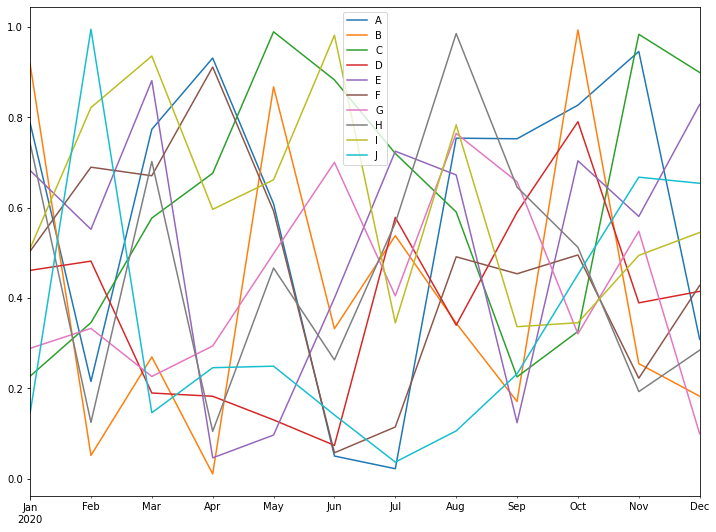

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import string

cols = [char for char in string.ascii_uppercase]
date = [dt.datetime(2020,m,1).strftime('%Y-%m-%d %H:%M:%S') for m in range(1,13)]
index = pd.to_datetime(date)

df = pd.DataFrame({i:np.random.rand(12) for i in cols[:10]}, index=index)
df.plot(figsize=(12,9))

In [ ]:
index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq=None)

# Exploratory Data Analysis (EDA) in 8 functions

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.replace(np.nan, "0", inplace = True)

In [ ]:
df[df.Age > 18]

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.Fare.boxplot()

AttributeError: ignored

In [ ]:
df.corr()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

# Fresnel Integrals
The `scipy.special.fresnel` function returns both the Fresnel functions but in the order (FS, FC), where FS stands for Fresnel sine integral and FC the Fresnel cosine integral. Fresnel itegrals are intimately related to Cornu spirals

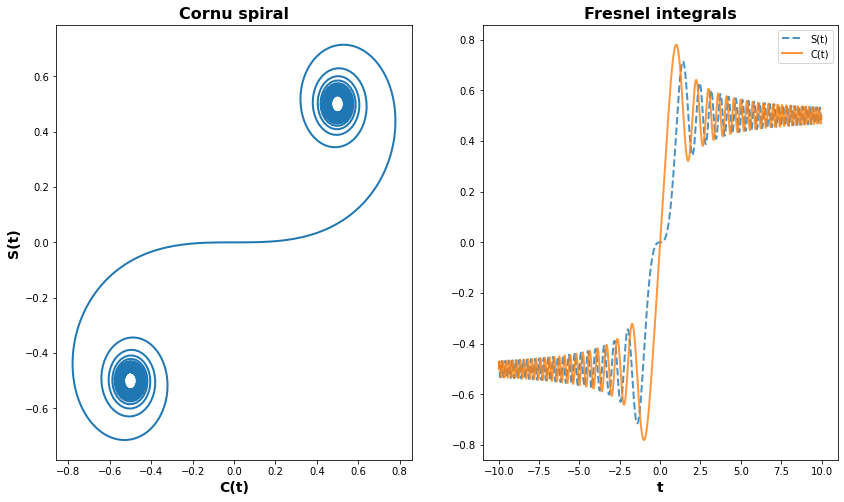

In [ ]:
from scipy.special import fresnel 
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 1000)
FS, FC = fresnel(t) 

fig1=plt.figure(figsize=(14,8))
ax1=plt.subplot(1, 2, 1)
ax1.plot(FC, FS, linewidth=2)
ax1.set_xlabel("C(t)", fontsize=14, weight='bold')
ax1.set_ylabel("S(t)", fontsize=14, weight='bold') 
ax1.set_title("Cornu spiral", fontsize=16, weight='bold')
ax2=plt.subplot(1, 2, 2)
ax2.plot(t, FS, ls='--', linewidth=2, label="S(t)", alpha=.8) 
ax2.plot(t, FC, ls='-', linewidth=2, label="C(t)", alpha=.8) 
ax2.set_xlabel("t", fontsize=14, weight='bold') 
ax2.set_title("Fresnel integrals", fontsize=16, weight='bold') 
plt.legend()
plt.show()

In [ ]:
!pip install -U plotly==4.9.0
import plotly
plotly.__version__

     |████████████████████████████████| 12.9 MB 4.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.7.0
    Uninstalling plotly-5.7.0:
      Successfully uninstalled plotly-5.7.0
